In [193]:
# 1 라이브러리 임포트

import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as sk

# 알고리즘을 그래픽화 하기위한 라이브러리
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import rcParams
import re
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Rescaling
import keras

# 모델생성 라이브러리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 스플릿,스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [194]:
# 1 데이터 불러오기 
path = "../Playground Series Season 3, Episode 3/playground-series-s3e3/"

train_csv = pd.read_csv(path+"train.csv")
test_csv = pd.read_csv(path+"test.csv")

In [195]:
# 2. 데이터 조회해보기
# y 값은 Attriton 이고 바이너리 
train_csv.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [196]:
# 3. 데이터 의 문자열 값 조회
print(np.unique(train_csv.BusinessTravel,return_counts=1),"\n",
np.unique(train_csv.Department,return_counts=1),"\n",
np.unique(train_csv.EducationField,return_counts=1))


(array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object), array([ 126,  261, 1290], dtype=int64)) 
 (array(['Human Resources', 'Research & Development', 'Sales'], dtype=object), array([  39, 1167,  471], dtype=int64)) 
 (array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object), array([ 13, 775, 152, 549,  82, 106], dtype=int64))


In [197]:
# 4. 데이터의 결측치 확인
train_csv.isna().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [198]:
# 학습데이터의 고유값 조회
train_csv.nunique()

id                          1677
Age                           43
BusinessTravel                 3
DailyRate                    625
Department                     3
DistanceFromHome              29
Education                      6
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       6
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome                895
MonthlyRate                  903
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             41
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

In [199]:
# 값이 1개인 칼럼만을 조회
train_csv.nunique()[train_csv.nunique() == 1]

EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64

In [200]:
# 값이 1개인 칼럼 삭제
train_csv.drop(["EmployeeCount", "Over18", "StandardHours","id"], axis=1, inplace=True)
test_csv.drop(["EmployeeCount", "Over18", "StandardHours","id"], axis=1, inplace=True)

In [201]:
train_csv

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,36,Travel_Frequently,599,Research & Development,24,3,Medical,4,Male,42,...,2,1,10,2,3,10,0,7,8,0
1,35,Travel_Rarely,921,Sales,8,3,Other,1,Male,46,...,4,1,4,3,3,4,2,0,3,0
2,32,Travel_Rarely,718,Sales,26,3,Marketing,3,Male,80,...,4,2,4,3,3,3,2,1,2,0
3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,3,Female,40,...,3,0,15,1,1,6,0,0,2,0
4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,2,Female,37,...,3,0,31,0,3,31,14,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672,30,Travel_Rarely,945,Sales,1,3,Life Sciences,4,Female,73,...,2,0,10,2,4,10,0,0,8,0
1673,32,Travel_Rarely,1303,Research & Development,2,3,Life Sciences,1,Male,48,...,4,1,10,3,4,4,2,1,3,0
1674,29,Travel_Frequently,1184,Human Resources,24,3,Human Resources,2,Male,36,...,3,0,1,2,3,1,0,0,0,1
1675,36,Travel_Rarely,441,Sales,9,2,Marketing,2,Male,48,...,3,2,10,3,2,10,3,0,8,0


In [202]:
# 데이터 조사 결과 데이터의 결측치가 없고 문자열케이스만 분리하면 됨

In [203]:
# 5. 데이터 원 핫 인코딩
# 1-1 겟더미로 문자열 제거 
train_csv = pd.get_dummies(train_csv)
test_csv = pd.get_dummies(test_csv)

In [204]:
# train 의 칼럼이 56개로 늘어남 ㄷㄷ
print(train_csv.shape,test_csv.shape)

(1677, 52) (1119, 51)


In [205]:
# 6. x 데이터와 y 데이터 분리
x = train_csv.drop(["Attrition"],axis=1)
y = train_csv.Attrition

In [206]:
# 7. train test 스플릿

x_train, x_test, y_train,y_test = train_test_split(
    x,
    y,
    train_size=0.8,
    shuffle = True,
    stratify = y,
    # random_state=21
)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1341, 51) (336, 51)
(1341,) (336,)


In [207]:
# # EDA 전체 비율 
# plt.figure(figsize=(9,9),)
# plt.title("Attrition")
# plt.pie(train_csv["Attrition"].value_counts(), labels = ["No", "Yes"], autopct='%.0f%%', textprops={'fontsize': 14},)
# plt.show()
# # 클래스 불균형이 일어남 12% vs 88% 임. .

In [208]:
# 8. 데이터 스케일링 
# scaler = MinMaxScaler()

# scaler.fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)
# print(x_train.shape,x_test.shape)
# print(y_train.shape,y_test.shape)

In [209]:
# 9. https://www.kaggle.com/code/alexandershumilin/ps-s3-e3-keras-nn 
# 윗 링크의 모델 따옴
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow_addons as tfa
dr = 0.2

def get_model():
    model = keras.Sequential([
    layers.Dense(512), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(256), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(128), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(64), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.BatchNormalization(),
    layers.Dense(32), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(16), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(8),
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(4), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dense(2), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dense(1, activation='sigmoid')
   ])

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    
    model.compile(
    optimizer=opt,
        loss=tfa.losses.SigmoidFocalCrossEntropy(
                                             alpha=0.8,
                                             gamma=2.0
                                             ),
        metrics='AUC',
)
    return model

early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_auc", 
        mode='max',
        patience=30,
        min_delta=0.00001,
        restore_best_weights=True,
)
plat = keras.callbacks.ReduceLROnPlateau(
        monitor="val_auc", 
        mode='max', 
        patience=3, 
        factor=0.1, 
        min_lr=1e-8, 
        min_delta=0.000001)


In [210]:

class_weight = 10
model = get_model()
history = model.fit(
        x_train, y_train,
        validation_split=0.2,
        batch_size=64,
        epochs=500,
        class_weight = { 0: 1.0, 1: class_weight, },
        callbacks=[early_stopping, plat],
        verbose=1
        )



Epoch 1/500


c:\Users\bitcamp\anaconda3\envs\tf274gpu\lib\site-packages\keras\engine\data_adapter.py:1510: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


17/17 [==============================] - 1s 25ms/step - loss: 0.3127 - auc: 0.4809 - val_loss: 0.0604 - val_auc: 0.5496 - lr: 1.0000e-04
Epoch 2/500
17/17 [==============================] - 0s 12ms/step - loss: 0.2538 - auc: 0.5303 - val_loss: 0.0502 - val_auc: 0.5749 - lr: 1.0000e-04
Epoch 3/500
17/17 [==============================] - 0s 13ms/step - loss: 0.2811 - auc: 0.4858 - val_loss: 0.0456 - val_auc: 0.5609 - lr: 1.0000e-04
Epoch 4/500
17/17 [==============================] - 0s 11ms/step - loss: 0.2369 - auc: 0.5471 - val_loss: 0.0420 - val_auc: 0.6011 - lr: 1.0000e-04
Epoch 5/500
17/17 [==============================] - 0s 11ms/step - loss: 0.2364 - auc: 0.5547 - val_loss: 0.0432 - val_auc: 0.6173 - lr: 1.0000e-04
Epoch 6/500
17/17 [==============================] - 0s 11ms/step - loss: 0.2409 - auc: 0.5257 - val_loss: 0.0434 - val_auc: 0.6216 - lr: 1.0000e-04
Epoch 7/500
17/17 [==============================] - 0s 11ms/step - loss: 0.2279 - auc: 0.5613 - val_loss: 0.0434 - va

In [211]:
# 기존모델
# from keras.callbacks import EarlyStopping,ReduceLROnPlateau

# early_stopping = EarlyStopping(
# monitor='val_loss',
# min_delta=0.01, patience=10, 
# verbose=1, 
# mode='min')

# plat =ReduceLROnPlateau(
#         monitor="val_loss", 
#         mode='min', 
#         patience=3, 
#         factor=0.1, 
#         min_lr=1e-8, 
#         min_delta=0.000001)

# # 이진분할 이기 떄문에 로스 binary_crossentropy
# model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

# # 
# hist = model.fit(x_train, y_train, epochs=500, 
#                  validation_split=0.2,
#                  batch_size=16,
#                  verbose=1,
#                  callbacks = [early_stopping,plat])


<AxesSubplot: >

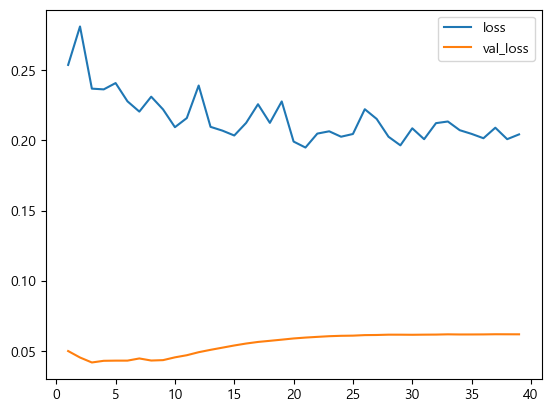

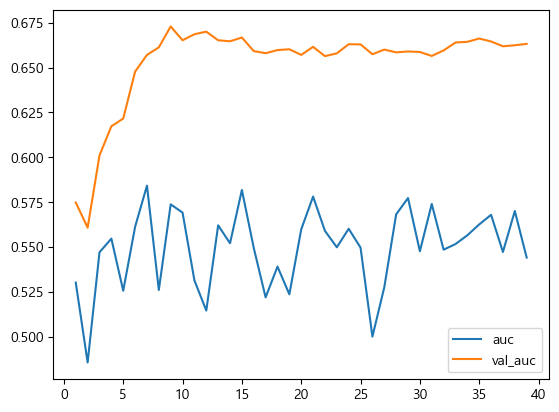

In [212]:
history_df = pd.DataFrame(history.history)
history_df.loc[1:, ['loss', 'val_loss']].plot()
history_df.loc[1:, ['auc', 'val_auc']].plot()

In [215]:
# 성능평가
from sklearn.metrics import classification_report
preds_eval=[]
preds_eval.append(model.predict(x))
    
print(classification_report(y, np.round(np.average(np.array(preds_eval),axis=0))))

              precision    recall  f1-score   support

           0       0.92      0.40      0.56      1477
           1       0.15      0.76      0.24       200

    accuracy                           0.44      1677
   macro avg       0.53      0.58      0.40      1677
weighted avg       0.83      0.44      0.52      1677



In [213]:
preds =[]

preds.append(model.predict(test_csv))
pred = np.average(np.array(preds),axis=0)

pred

# 15-3 경로와 파일명 지정
submission = pd.read_csv(path +"sample_submission.csv",index_col="id")
submission['Attrition'] = pred
# 임계값을 0 으로 변경
# submission['Attrition'] = np.where(submission['Attrition'] > 0.5, 1 , 0)


submission.to_csv(path+"submission_4.csv")

submission['Attrition'][:20]

C:\Users\bitcamp\AppData\Local\Temp\ipykernel_12700\3711011123.py:17: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  submission['Attrition'][:20]


id
1677    0.563147
1678    0.499951
1679    0.565453
1680    0.520504
1681    0.569067
1682    0.561418
1683    0.451773
1684    0.547329
1685    0.478816
1686    0.561761
1687    0.375833
1688    0.572855
1689    0.563047
1690    0.549182
1691    0.495313
1692    0.549362
1693    0.565985
1694    0.572706
1695    0.535423
1696    0.565393
Name: Attrition, dtype: float32